# 고객 그룹핑하기

- `Cust_Spend_Data.csv` 파일
- 고객의 의류소비, 음료소비, 음식소비 데이터를 통해서 비슷한 고객으로 그룹핑하기

# lib 및 데이터 로딩

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df로 데이터 로딩 및 df 만들기
data_path = 'datas_ml/Cust_Spend_Data.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


# 데이터 확인

In [4]:
# 데이터 프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          10 non-null     int64 
 1   Name             10 non-null     object
 2   Avg_Mthly_Spend  10 non-null     int64 
 3   No_Of_Visits     10 non-null     int64 
 4   Apparel_Items    10 non-null     int64 
 5   FnV_Items        10 non-null     int64 
 6   Staples_Items    10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


In [5]:
# df의 nan 확인

df.isna().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [6]:
# df 데이터프레임의 컬럼명 확인
df.columns

Index(['Cust_ID', 'Name', 'Avg_Mthly_Spend', 'No_Of_Visits', 'Apparel_Items',
       'FnV_Items', 'Staples_Items'],
      dtype='object')

In [7]:
# X 데이터 추출 : Avg_Mthly_Spend 컬럼 ~ 마지막 컬럼까지
X = df.loc[:, 'Avg_Mthly_Spend':]

In [8]:
X

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


# 정규화 및 df로 확인하기
- StandardScaler로 정규화

In [9]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DataFrame으로 변환
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

X_scaled

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


# dendrogram 그리기

In [10]:
import scipy.cluster.hierarchy as sch

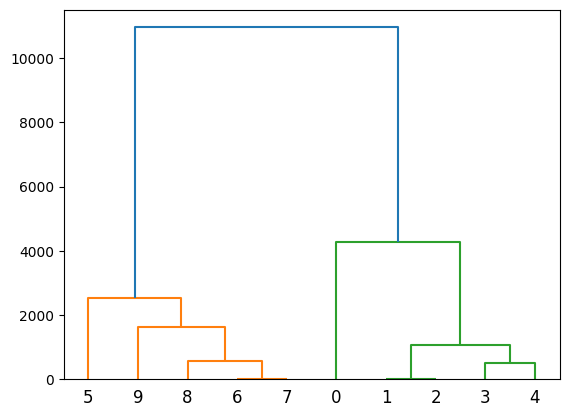

In [11]:
# method='ward'
sch.dendrogram( sch.linkage(X, method='ward') ) 
plt.show()

In [ ]:
# 가장 best한 클러스터 수는 : 2

# 계층적 군집 방법으로 그룹핑

In [12]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2)

y_pred = hc.fit_predict(X_scaled)

df['Group_hc'] = y_pred

In [13]:
# df에 그루핑 정보 추가한 결과
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group_hc
0,1,A,10000,2,1,1,0,1
1,2,B,7000,3,0,10,9,0
2,3,C,7000,7,1,3,4,1
3,4,D,6500,5,1,1,4,1
4,5,E,6000,6,0,12,3,0


# K-means로 그룹핑하기

In [14]:
from sklearn.cluster import KMeans

In [21]:
# 최적의 그루핑 갯수 찾기 (엘보 메서드 수행), WCSS 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [22]:
# wcss 확인
wcss

[50.0,
 37.74456431473695,
 19.885638113149092,
 13.53470661846263,
 8.843370611687146,
 3.135405807210927,
 2.036462672407283,
 1.1494998966150178,
 0.2938441747231336,
 0.0]

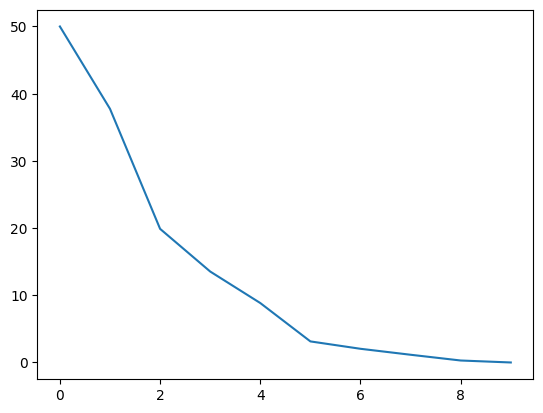

In [23]:
# wcss 확인하기
import matplotlib.pyplot as plt
plt.plot(wcss)
plt.show()

In [18]:
# 가장 best한 k는 얼마로 하는게 좋을까? 3

In [27]:
#  Kmeans 클러스터 수행 : 클러스터 ?개, 랜덤 시드 5
kmeans = KMeans(n_clusters=3, random_state=5)

y_pred = kmeans.fit_predict(X_scaled)

In [28]:
# 예측 결과 확인
y_pred

array([0, 2, 0, 0, 2, 1, 2, 1, 1, 1], dtype=int32)

In [29]:
# 데이터 프레임에 추가하기
df['Group_km'] = kmeans.labels_

In [30]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group_hc,Group_km
0,1,A,10000,2,1,1,0,1,0
1,2,B,7000,3,0,10,9,0,2
2,3,C,7000,7,1,3,4,1,0
3,4,D,6500,5,1,1,4,1,0
4,5,E,6000,6,0,12,3,0,2


### 그룹핑 결과 차이 확인
- df 컬럼 `Group_hc`와 `Group_km` 값이 서로 다른것 찾기

In [23]:
# E, F, G

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group_hc,Group_km
1,2,B,7000,3,0,10,9,1,2
4,5,E,6000,6,0,12,3,1,2
5,6,F,4000,3,0,1,8,2,1
6,7,G,2500,5,0,11,2,1,2
7,8,H,2500,3,0,1,1,2,1
8,9,I,2000,2,0,2,2,2,1
9,10,J,1000,4,0,1,7,2,1


In [31]:
# 수고했습니다. ^^